In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('monthly_milk_production.csv',index_col='Date',parse_dates=True) # in any timeseries data index will be date
# on the basis of time we can filter data.

In [ ]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

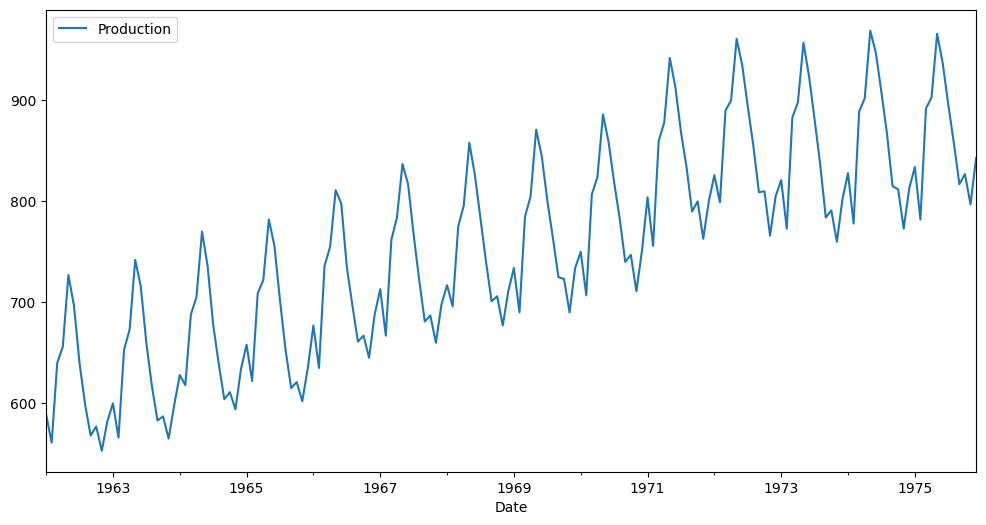

In [ ]:
df.plot(figsize=(12,6))
#plotting this data. There is trend and seasonality as well. And some irregularity/residual also we can see.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose # decomposing the components

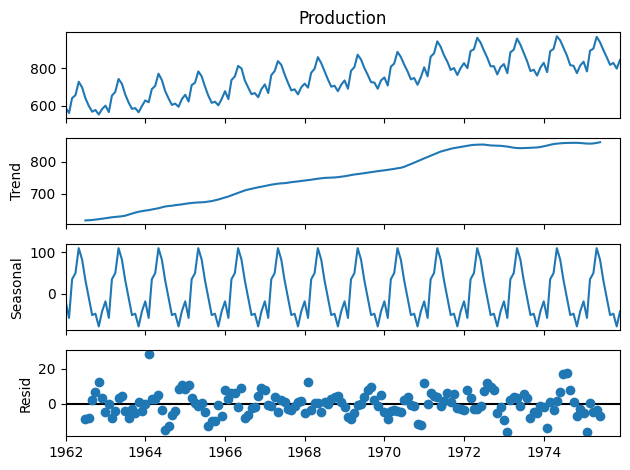

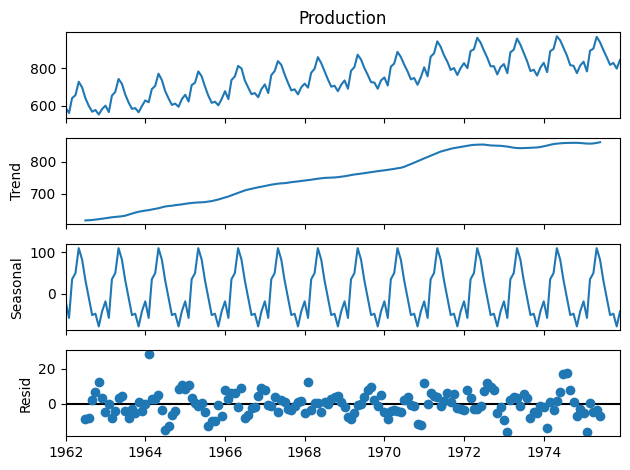

In [ ]:
results = seasonal_decompose(df['Production'])
results.plot()

In [ ]:
len(df)

168

In [ ]:
train = df.iloc[:156]
test = df.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # performing minmax scaler on the data

In [ ]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
# Now the data should be arranged in the form--

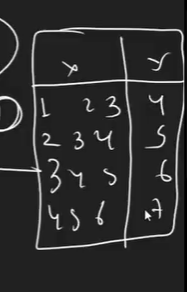

In [ ]:
# For this we will use timeseries generator
#from keras.preprocessing.sequence import TimeseriesGenerator
#from tensorflow.keras.utils import TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
# our goal is to predict the monthly milk production.
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
X.shape
# In NLP we have to build this but with time series generator , we have this.

(1, 3, 1)

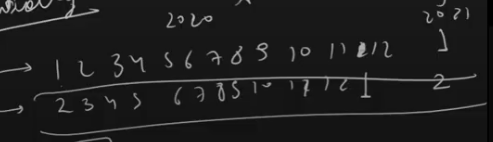

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1) # batch size=1 means in every batch 1 row.
# Do remeber in sequential time series data the batch size=1.
# This is because time series data is very sensitive and the no. of batch size we have that many back propogations we have.
# and so model can rectify its mistakes.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features))) # input_shape=12 rows 1 col, this is like number of features in x
# and number of features in y
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit model
model.fit(generator,epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1091
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0252
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0230
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0132
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0126
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0069
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0070
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0100
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0051
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - l

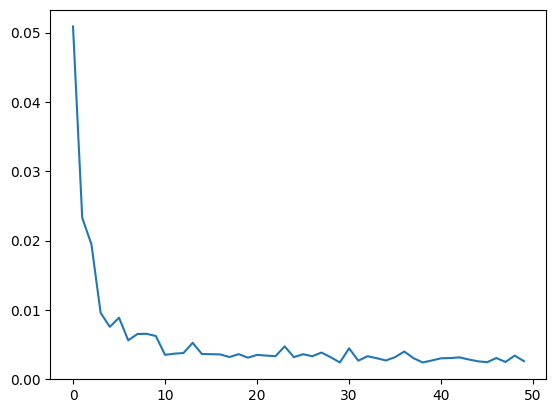

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:] # fetaching last 12 data of training.

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features)) # we want our data in the form no. of batch,
# number of input rows, number of features

In [ ]:
model.predict(last_train_batch)
# now the training data where it ends, after that comes the 1st data point of test data.
# So the 1st point of data it predicted as 0.60

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


array([[0.60308313]], dtype=float32)

In [ ]:
scaled_test[0] # getting the actual 1st point of test data. It is 0.67
# the error is there but approximately near by.

array([0.67548077])

In [ ]:
# so for next data point we will be moving window. So training data 11 points and 1 point of test data to predict 2nd point of test data.
# So the logic for doing this is written here.
test_predictions = [] # take an empty list for storing all the predictions.
first_eval_batch = scaled_train[-n_input:] # taking the last 12 data points
current_batch = first_eval_batch.reshape((1, n_input, n_features)) #reshaping into batches

for i in range(len(test)): # next we r running loop for each data point in test dataset. Basically 12 times.

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    print(current_pred)

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[0.60308313]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0.6203779]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[0.78075385]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[0.8769557]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[0.97512954]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[0.96594465]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[0.89386463]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[0.78454494]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[0.67479956]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[0.6139276]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[0.5641423]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[0.58243644]


In [ ]:
test_predictions

[array([0.60308313], dtype=float32),
 array([0.6203779], dtype=float32),
 array([0.78075385], dtype=float32),
 array([0.8769557], dtype=float32),
 array([0.97512954], dtype=float32),
 array([0.96594465], dtype=float32),
 array([0.89386463], dtype=float32),
 array([0.78454494], dtype=float32),
 array([0.67479956], dtype=float32),
 array([0.6139276], dtype=float32),
 array([0.5641423], dtype=float32),
 array([0.58243644], dtype=float32)]

In [ ]:
test.head()
# since the scale of test_predictions and test.head() output we see are different. So we can convert either of them into other.
# During scaling we transformed the data to bring it into smaller scale. So inverse_transform it.

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-35-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

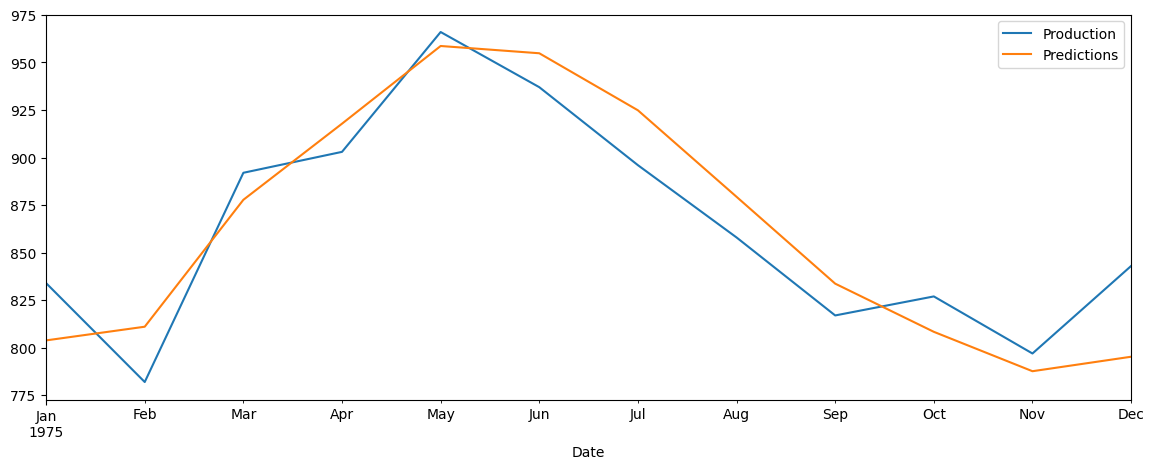

In [ ]:
test.plot(figsize=(14,5)) # blue is the actual one orange is predicted.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

23.84502459920261


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Production'], test['Predictions'])
print('MAE: %f' % mae)

MAE: 21.329836
